In [1]:
# %matplotlib notebook
using Distributed
# addprocs();

In [2]:
using PyPlot
@everywhere using Revise

using HDF5

@everywhere using CSV
@everywhere using DataFrames
@everywhere using JLD2
@everywhere using RealNeuralNetworks
@everywhere using RealNeuralNetworks.Neurons
@everywhere using RealNeuralNetworks.SWCs
@everywhere using RealNeuralNetworks.NBLASTs
@everywhere using RealNeuralNetworks.Neurons.Segments.Synapses
@everywhere using RealNeuralNetworks.Utils.RangeIndexingArrays
@everywhere using RealNeuralNetworks.Utils.VectorClouds

@everywhere using ProgressMeter

@everywhere DATASET_DIR = expanduser("~/seungmount/research/Jingpeng/14_zfish/01_data/20190415")

In [3]:
# println("valid neurons in google spread sheet:")
# # neuronIdListInSheet = Set([76181,76182,76183,76184,76185,76186,76187,76188,76189,76190,76191,76192,76193,76194,76195,76196,76197,76198,76199,76200,76201,76210,76261,76262,76263,76264,76265,76266,76267,76268,76269,76270,76271,76272,76273,76274,76288,76289,76290,76291,76292,76293,76348,76349,76350,76351,76353,76354,76355,76381,76382,76383,76384,76385,76386,76387,76388,76389,76390,76391,76392,76393,76399,76400,76401,76402,76403,76404,76405,76406,76407,76409,76410,76411,76412,76413,76414,76415,76451,76452,76453,76454,76455,76456,76457,76462,76463,76464,76465,76466,76468,76469,76470,76471,76472,76473,76474,76475,76485,76486,76487,76491,76492,76493,76494,76495,76496,76497,76530,76531,76532,76537,76538,76539,76540,76541,76542,76543,76544,76551,76552,76553,76554,76555,76556,76560,76561,76562,76564,76565,76567,76568,76569,76570,76571,76606,76607,76608,76609,76610,76611,76612,76613,76614,76618,76619,76620,76621,76622,76623,76624,76625,76626,76627,76628,76629,76630,76631,76632,76633,76634,76635,76636,76654,76655,76656,76657,76659,76660,76661,76664,76666,76667,76670,76673,76675,76677,76679,76681,76682,76684,76688,76690,76691,76692,76693,76694,76697,76698,76700,76701,76748,76749,76750,76751,76773,76774,76776,76777,76778,76779,76780,76781,76782,76783,76784,76786,76787,76843,76844,76846,76849,76826,76827,76828,76829,76830,76831,76832,76833,76834,76835,76836,76837,76838,76857,76858,76859,76860,76861,76863,76864,76866,76867,76868,76869,76871,76872,76873,76874,76875,76876,76877,76878,76879,76880,76889,76890,76892,76893,76894,76896,76897,76898,76899,76900,76901,76902,76903,76904,76906,76907,76908,76912,76915,76918,76921,76922,76923,76924,76925,76926,76927,76928,76929,76930,76931,76932,76933,76935,76936,76938,76940,76941,76942,76943,76944,76947,76948,76949,76950,76952,76953,76955,76956,76957,76962,76964,76965,76966,76967,76968,76972,77018,77019,77020,77021,77022,77024,77025,77026,77027,77029,77030,77031,77032,77034,77036,77039,77041,77044,77047,77048,77050,77052,77053,77054,77056,77057,77058,77059,77060,77061,77063,77066,77068,77069,77070,77071,77072,77074,77075,77076,77078,77079,77080,77081,77082,77083,77084,77085,77086,77088,77089,77090,77091,77092,77093,77094,77095,77096,77098,77101,77102,77103,77104,77105,77107,77108,77109,77110,77112,77120,77121,77122,77124,77125,77126,77127,77128,77132,77135,77137,77138,77140,77142,77144,77146,76883,76884,76885,76886,76887,77148,77150,77151,77152,77153,77154,77156,77157,77158,77162,77163,77231,77232,77233,77235,77237,77238,77239,77240,77241,77244,77247,77248,77249,77250,77251,77252,77253,77254,77255,77259,77260,77261,77262,77263,77264,77265,77267,77268,77292,77295,77296,77298,77299,77300,77301,77302,77303,77304,77305,77326,77327,77328,77329,77331,77332,77336,77338,77339,77341,77342,77344,77348,77349,77350,77352,77353,77354,77355,77357,77358,77364,77366,77368,77369,77370,77371,77372,77373,77374,77375,77376,77377,77378,77384,77386,77387,77389,77390,77391,77392,77393,77394,77395,77399,77433,77434,77435,77437,77441,77442,77444,77445,77446,77447,77448,77449,77450,77452,77453,77455,77456,77457,77459,77460,77461,77462,77463,77464,77465,77466,77467,77471,77472,77483,77484,77485,77486,77487,77488,77489,77490,77492,77493,77494,77495,77496,77497,77498,77499,77500,77501,77502,77503,77504,77505,77506,77507,77508,77509,77510,77511,77512,77513,77514,77515,77517,77521,77523,77524,77525,77526,77527,77528,77529,77530,77531,77532,77533,77534,77535,77536,77537,77538,77539,77578,77579,77580,77581,77582,77586,77587,77588,77589,77591,77592,77594,77595,77596,77597,77598,77599,77602,77605,77607,77610,77611,77618,77621,77625,77626,77628,77630,77631,77634,77636,77640,77641,77643,77645,77646,77648,77651,77652,77654,77656,77657,77658,77660,77661,77662,77664,77665,77667,77668,77670,77672,77682,77683,77684,77686,77688,77689,77692,77694,77695,77697,77705,77708,77709,77710,77740,77741,77742,77743,77744,77745,77746,77748,77750,77751,77753,77754,77755,77756,77757,77758,77759,77765,77766,77767,77768,77770,77771,77772,77773,77774,77775,77778,77779,77780,77782,77792,77794,77797,77799,77802,77803,77805,77806,77807,77809,77810,77811,77815,77816,77817,77818,77819,77820,77821,77822,77823,77824,77825,77826,77827,77828,77829,77830,77842,77844,77845,77846,77848,77849,77852,77855,77857,77858,77862,77863,77864,77865,77868,77869,77870,77871,77872,77873,77885,77886,77887,77889,77890,77891,77892,77893,77894,77895,77896,77897,77898,77899,77900,77901,77902,77903,77904,77905,77906,77907,77908,77909,77910,77911,77912,77913,77914,77927,77928,77929,77930,77931,77932,77933,77934,77935,77936,77937,77938,77939,77940,77941,77942,77943,77944,77945,77946,78045,78046,78047,78048,78049,78050,78051,78052,78053,78054,78055,78056,78057,78058,78059,78060,78061,78062,78063,78064,78065,78082,78083,78086,78087,78088,78089,78090,78091,78092,78094,78095,78096,78097,78099,78100,78102,78103,78104,78106,78107,78110,78111,78112,78113,78116,78118,78119,78120,78121,78123,78124,78125,78126,78127,78128,78129,78130,78131,78132,78133,78134,78136,78139,78140,78141,78142,78143,78144,78146,78148,78150,78151,78152,78154,78155,78157,78158,78159,78160,78162,78163,78164,78166,78167,78168,78169,78171,78172,78173,78174,78175,78176,78177,78178,78179,78180,78181,78184,78185,78186,78188,78226,78227,78229,78230,78231,78232,78233,78235,78236,78237,78238,78239,78240,78241,78243,78245,78246,78250,78253,78254,78255,78256,78258,78259,78260,78261,78262,78264,78266,78267,78268,78269,78270,78273,78274,78275,78277,78280,78282,78293,78294,78297,78298,78299,78301,78303,78304,78307,78308,78310,78313,78317,78318,78320,78321,78328,78332,78333,78335,78338,78339,78340,78341,78343,78345,78346,78347,78348,78349,78350,78351,78353,78354,78355,78356,78357,78358,78359,78391,78392,78393,78395,78397,78399,78400,78401,78404,78405,78406,78409,78410,78411,78412,78413,78415,78418,78419,78420,78421,78426,78429,78430,78434,78435,78437,78438,78439,78440,78441,78442,78443,78447,78448,78450,78451,78452,78453,78454,78455,78457,78459,78460,78465,78466,78537,78540,78541,78542,78543,78544,78545,78547,78548,78550,78552,78553,78554,78556,78557,78558,78563,78564,78566,78567,78572,78574,78576,78577,78579,78580,78581,78582,78583,78584,78585,78586,78594,78595,78596,78597,78598,78599,78601,78602,78603,78604,78606,78607,78608,78609,78610,78613,78615,78616,78617,78618,78619,78621,78622,78624,78626,78627,78628,78629,78630,78631,78632,78633,78634,78635,78637,78641,78643,78644,78646,78647,78649,78650,78651,78652,78653,78654,78655,78656,78657,78663,78664,78665,78666,78667,78668,78670,78671,78672,78675,78677,78678,78679,78680,78681,78682,78684,78685,78687,78693,78694,78695,78696,78697,78698,78699,78701,78702,78756,78757,78758,78759,78760,78761,78762,78763,78764,78765,78766,78767,78768,78769,78770,78771,78772,78773,78774,78775,78776,78777,78778,78779,78780,78781,78782,78783,78784,78785,78786,78787,78788,78789,78790,78791,78793,78794,78795,78796,78797,78799,78800,78802,78803,78804,78805,78806,78807,78808,78810,78811,78813,78814,78815,78816,78817,78819,78820,78821,78822,78824,78825,78826,78827,78828,78829,78830,78831,78832,78833,78834,78835,78836,78837,78838,78839,78840,78841,78842,78843,78844,78845,78846,78847,78848,78849,78850,78851,78852,78853,78854,78855,78856,78857,78858,78860,78861,78863,78864,78865,78866,78868,78869,78870,78872,78873,78874,78876,78877,78878,78880,78881,78882,78883,78884,78886,78887,78888,78889,78891,78894,78896,78897,78899,78900,78901,78903,78904,78905,78907,78908,78909,78910,78911,78912,78913,78914,78916,78917,78918,78919,78923,78924,78925,78926,78935,78936,78939,78940,78946,78947,78948,78949,78953,78955,78956,78957,78958,78960,78961,78962,78964,78965,78966,78968,78969,78970,78971,78972,78973,78978,78979,78980,78981,78982,78983,78985,79008,79009,79012,79013,79014,79017,79018,79020,79021,79022,79023,79024,79025,79026,79030,79031,79032,79033,79036,79039,79040,79042,79043,79044,79045,79046,79047,79048,79049,79051,79053,79054,79055,79058,79059,79060,79062,79064,79066,79067,79069,79072,79074,79077,79078,79080,79083,79084,79085,79086,79117,79118,79119,79120,79121,79122,79123,79124,79125,79126,79127,79128,79129,79130,79131,79132,79133,79134,79135,79136,79137,79138,79139,79140,79141,79142,79144,79145,79146,79147,79149,79150,79151,79152,79153,79154,79155,79156,79157,79158,79159,79160,79161,79162,79163,79164,79165,79166,79167,79168,79169,79170,79171,79172,79173,79175,79177,79178,79180,79181,79182,79183,79184,79185,79187,79188,79189,79192,79193,79194,79195,79196,79197,79199,79200,79201,79202,79203,79204,79205,79206,79207,79208,79209,79210,79211,79214,79215,79216,79219,79220,79221,79222,79224,79225,79226,79227,79228,79230,79231,79232,79233,79235,79236,79237,79239,79240,79241,79242,79243,79244,79247,79248,79251,79252,79254,79255,79257,79258,79259,79261,79262,79266,79267,79268,79269,79270,79271,79273,79274,79275,79280,79282,79286,79288,79289,79291,79293,79296,79300,79301,79302,79303,79304,79305,79306,79308,79309,79311,79312,79314,79315,79317,79319,79320,79322,79323,79324,79326,79327,79328,79330,79334,79335,79337,79339,79341,79342,79343,79344,79346,79347,79348,79349,79351,79355,79356,79357,79359,79361,79362,79363,79365,79366,79367,79368,79369,79370,79371,79372,79373,79377,79378,79379,79382,79383,79385,79388,79391,79392,79394,79395,79396,79399,79400,79401,79402,79403,79405,79406,79408,79409,79410,79417,79418,79420,79422,79423,79426,79432,79433,79434,79436,79437,79439,79440,79441,79443,79447,79449,79451,79452,79453,79455,79456,79457,79458,79459,79460,79461,79462,79463,79464,79465,79467,79468,79469,79470,79472,79473,79475,79477,79478,79480,79481,79483,79484,79488,79491,79492,79494,79498,79500,79501,79503,79504,79505,79506,79507,79509,79510,79512,79513,79514,79515,79516,79517,79518,79520,79521,79523,79524,79526,79527,79528,79529,79530,79531,79533,79534,79536,79537,79540,79542,79543,79544,79545,79546,79548,79550,79553,79554,79555,79556,79557,79558,79559,79560,79562,79565,79568,79569,79571,79572,79573,79574,79575,79576,79578,79579,79580,79581,79582,79584,79586,79587,79642,79643,79645,79646,79647,79649,79650,79651,79652,79653,79654,79655,79656,79657,79658,79660,79661,79662,79663,79664,79666,79667,79668,79669,79670,79671,79672,79673,79675,79676,79677,79678,79680,79681,79682,79683,79684,79685,79686,79687,79689,79690,79691,79692,79693,79694,79695,79696,79698,79699,79700,79702,79704,79705,79706,79707,79708,79709,79712,79713,79714,79716,79718,79719,79720,79721,79722,79723,79724,79725,79726,79728,79730,79731,79732,79733,79734,79735,79736,79737,79738,79740,79742,79743,79744,79745,79746,79747,79748,79751,79752,79753,79754,79756,79757,79758,79759,79760,79762,79763,79764,79765,79767,79768,79770,79771,79772,79773,79775,79776,79778,79779,79780,79781,79782,79784,79786,79787,79790,79792,79793,79794,79796,79798,79799,79800,79801,79802,79803,79804,79807,79808,79809,79810,79811,79812,79813,79815,79816,79817,79818,79819,79820,79822,79823,79825,79827,79828,79829,79830,79831,79832,79833,79834,79835,79838,79839,79844,79847,79848,79849,79851,79852,79853,79854,79855,79858,79859,79860,79861,79864,79865,79866,79867,79869,79871,79872,79875,79876,79877,79878,79879,79880,79881,79883,79884,79885,79886,79887,79892,79893,79894,79896,79899,79901,79902,79907,79908,79910,79911,79912,79913,79915,79916,79918,79919,79920,79921,79922,79923,79924,79925,79927,79928,79930,79932,79936,79937,79939,79940,79941,79943,79944,79945,79946,79948,79949,79950,79951,79953,79955,79956,79957,79958,79959,79960,79961,79962,79963,79964,79965,79966,79968,79969,79970,79972,79974,79975,79976,79977,79978,79979,80021,80041,80042,80043,80044,80162,80163,80164,80165,80166,80167,80173,80177,80179,80180,80181,80185,80187,80188,80190,80191,80194,80196,80199,80201,80203,80204,80205,80206,80207,80209,80210,80211,80212,80213,80214,80215,80216,80217,80219,80221,80223,80224,80227,80229,80230,80231,80232,80234,80237,80240,80241,80242,80244,80245,80246,80247,80248,80250,80252,80256,80262,80263,80266,80268,80269,80271,80273,80274,80275,80279,80282,80284,80285,80286,80287,80288,80289,80291,80292,80294,80297,80298,80299,80300,80301,80302,80303,80304,80305,80306,80308,80309,80311,80313,80314,80315,80316,80318,80319,80321,80322,80323,80325,80326,80327,80329,80330,80331,80336,80337,80338,80339,80340,80341,80345,80346,80347,80348,80349,80350,80352,80353,80354,80355,80357,80360,80465,80466,80467,80470,80472,80473,80474,80478,80479,80482,80490,80493,80496,80503,80506,80510,80512,80514,80517,80518,80519,80524,80526,80527,80529,80532,80533,80536,80537,80539,80542,80544,80547,80548,80549,80550,80552,80554,80568,80569,80570,80572,80573,80575,80579,80580,80581,80582,80584,80585,80591,80593,80596,80597,80599,80600,80601,80603,80604,80606,80607,80608,80609,80610,80611,80612,80613,80614,80615,80620,80622,80623,80624,80625,80626,80627,80628,80629,80630,80635,80636,80639,80640,80643,80646,80647,80648,80652,80654,80655,80662,80664,80667,80668,80669,80670,80672,80675,80677,80679,80681,80682,80686,80689,80690,80691,80692,80694,80695,80696,80698,80699,80700,80701,80706,80707,80708,80710,80711,80716,80717,80718,80720,80721,80724,80725,80726,80727,80728,80729,80733,80734,80735,80737,80738,80739,80740,80741,80742,80743,80744,80746,80748,80749,80750,80753,80757,80759,80760,80761,80762,80763,80764,80768,80773,80775,80777,80787,80788,80792,80793,80796,80800,80801,80803,80804,80805,80807,80808,80810,80811,80812,80816,80821,80822,80823,80825,80828,80829,80834,80838,80841,80842,80844,80847,80850,80851,80852,80854,80862,80866,80868,80869,80872,80873,80874,80875,80876,80877,80879,80881,80883,80885,80887,80888,80889,80890,80934,80936,80937,80938,80939,80940,80943,80946,80947,80949,80950,80954,80955,80956,80963,80965,80966,80967,80971,80972,80973,80974,80980,80981,80983,80985,80986,80987,80991,80993,80994,80995,80998,81000,81001,81002,81004,81005,81007,81008,81009,81011,81012,81013,81016,81017,81020,81021,81023,81024,81025,81027,81028,81030,81031,81032,81033,81035,81037,81040,81044,81045,81057,81058,81059,81061,81062,81064,81065,81068,81074,81075,81076,81080,81081,81082,81083,81084,81086,81087,81088,81089,81090,81092,81095,81097,81101,81103,81104,81108,81111,81114,81116,81117,81120,81121,81122,81126,81135,81136,81138,81139,81144,81145,81147,81148,81151,81152,81153,81155,81156,81158,81159,81160])
# # neuronIdListInSheet = Set([76181,76182,76183,76184,76185,76186,76187,76188,76189,76190,76191,76192,76193,76194,76195,76196,76197,76198,76199,76200,76201,76210,76261,76262,76263,76264,76265,76266,76267,76268,76269,76270,76271,76272,76273,76274,76288,76289,76290,76291,76292,76293,76348,76349,76350,76351,76353,76354,76355,76381,76382,76383,76384,76385,76386,76387,76388,76389,76390,76391,76392,76393,76399,76400,76401,76402,76403,76404,76405,76406,76407,76409,76410,76411,76412,76413,76414,76415,76451,76452,76453,76454,76455,76456,76457,76462,76463,76464,76465,76466,76468,76469,76470,76471,76472,76473,76474,76475,76485,76486,76487,76491,76492,76493,76494,76495,76496,76497,76530,76531,76532,76537,76538,76539,76540,76541,76542,76543,76544,76551,76552,76553,76554,76555,76556,76560,76561,76562,76564,76565,76567,76568,76569,76570,76571,76606,76607,76608,76609,76610,76611,76612,76613,76614,76618,76619,76620,76621,76622,76623,76624,76625,76626,76627,76628,76629,76630,76631,76632,76633,76634,76635,76636,76654,76655,76656,76657,76659,76660,76661,76664,76666,76667,76670,76673,76675,76677,76679,76681,76682,76684,76688,76690,76691,76692,76693,76694,76697,76698,76700,76701,76748,76749,76750,76751,76773,76774,76776,76777,76778,76779,76780,76781,76782,76783,76784,76786,76787,76843,76844,76846,76849,76826,76827,76828,76829,76830,76831,76832,76833,76834,76835,76836,76837,76838,76857,76858,76859,76860,76861,76863,76864,76866,76867,76868,76869,76871,76872,76873,76874,76875,76876,76877,76878,76879,76880,76889,76890,76892,76893,76894,76896,76897,76898,76899,76900,76901,76902,76903,76904,76906,76907,76908,76912,76915,76918,76921,76922,76923,76924,76925,76926,76927,76928,76929,76930,76931,76932,76933,76935,76936,76938,76940,76941,76942,76943,76944,76947,76948,76949,76950,76952,76953,76955,76956,76957,76962,76964,76965,76966,76967,76968,76972,77018,77019,77020,77021,77022,77024,77025,77026,77027,77029,77030,77031,77032,77034,77036,77039,77041,77044,77047,77048,77050,77052,77053,77054,77056,77057,77058,77059,77060,77061,77063,77066,77068,77069,77070,77071,77072,77074,77075,77076,77078,77079,77080,77081,77082,77083,77084,77085,77086,77088,77089,77090,77091,77092,77093,77094,77095,77096,77098,77101,77102,77103,77104,77105,77107,77108,77109,77110,77112,77120,77121,77122,77124,77125,77126,77127,77128,77132,77135,77137,77138,77140,77142,77144,77146,76883,76884,76885,76886,76887,77148,77150,77151,77152,77153,77154,77156,77157,77158,77162,77163,77231,77232,77233,77235,77237,77238,77239,77240,77241,77244,77247,77248,77249,77250,77251,77252,77253,77254,77255,77259,77260,77261,77262,77263,77264,77265,77267,77268,77292,77295,77296,77298,77299,77300,77301,77302,77303,77304,77305,77326,77327,77328,77329,77331,77332,77336,77338,77339,77341,77342,77344,77348,77349,77350,77352,77353,77354,77355,77357,77358,77364,77366,77368,77369,77370,77371,77372,77373,77374,77375,77376,77377,77378,77384,77386,77387,77389,77390,77391,77392,77393,77394,77395,77399,77433,77434,77435,77437,77441,77442,77444,77445,77446,77447,77448,77449,77450,77452,77453,77455,77456,77457,77459,77460,77461,77462,77463,77464,77465,77466,77467,77471,77472,77483,77484,77485,77486,77487,77488,77489,77490,77492,77493,77494,77495,77496,77497,77498,77499,77500,77501,77502,77503,77504,77505,77506,77507,77508,77509,77510,77511,77512,77513,77514,77515,77517,77521,77523,77524,77525,77526,77527,77528,77529,77530,77531,77532,77533,77534,77535,77536,77537,77538,77539,77578,77579,77580,77581,77582,77586,77587,77588,77589,77591,77592,77594,77595,77596,77597,77598,77599,77602,77605,77607,77610,77611,77618,77621,77625,77626,77628,77630,77631,77634,77636,77640,77641,77643,77645,77646,77648,77651,77652,77654,77656,77657,77658,77660,77661,77662,77664,77665,77667,77668,77670,77672,77682,77683,77684,77686,77688,77689,77692,77694,77695,77697,77705,77708,77709,77710,77740,77741,77742,77743,77744,77745,77746,77748,77750,77751,77753,77754,77755,77756,77757,77758,77759,77765,77766,77767,77768,77770,77771,77772,77773,77774,77775,77778,77779,77780,77782,77792,77794,77797,77799,77802,77803,77805,77806,77807,77809,77810,77811,77815,77816,77817,77818,77819,77820,77821,77822,77823,77824,77825,77826,77827,77828,77829,77830,77842,77844,77845,77846,77848,77849,77852,77855,77857,77858,77862,77863,77864,77865,77868,77869,77870,77871,77872,77873,77885,77886,77887,77889,77890,77891,77892,77893,77894,77895,77896,77897,77898,77899,77900,77901,77902,77903,77904,77905,77906,77907,77908,77909,77910,77911,77912,77913,77914,77927,77928,77929,77930,77931,77932,77933,77934,77935,77936,77937,77938,77939,77940,77941,77942,77943,77944,77945,77946,78045,78046,78047,78048,78049,78050,78051,78052,78053,78054,78055,78056,78057,78058,78059,78060,78061,78062,78063,78064,78065,78082,78083,78086,78087,78088,78089,78090,78091,78092,78094,78095,78096,78097,78099,78100,78102,78103,78104,78106,78107,78110,78111,78112,78113,78116,78118,78119,78120,78121,78123,78124,78125,78126,78127,78128,78129,78130,78131,78132,78133,78134,78136,78139,78140,78141,78142,78143,78144,78146,78148,78150,78151,78152,78154,78155,78157,78158,78159,78160,78162,78163,78164,78166,78167,78168,78169,78171,78172,78173,78174,78175,78176,78177,78178,78179,78180,78181,78184,78185,78186,78188,78226,78227,78229,78230,78231,78232,78233,78235,78236,78237,78238,78239,78240,78241,78243,78245,78246,78250,78253,78254,78255,78256,78258,78259,78260,78261,78262,78264,78266,78267,78268,78269,78270,78273,78274,78275,78277,78280,78282,78293,78294,78297,78298,78299,78301,78303,78304,78307,78308,78310,78313,78317,78318,78320,78321,78328,78332,78333,78335,78338,78339,78340,78341,78343,78345,78346,78347,78348,78349,78350,78351,78353,78354,78355,78356,78357,78358,78359,78391,78392,78393,78395,78397,78399,78400,78401,78404,78405,78406,78409,78410,78411,78412,78413,78415,78418,78419,78420,78421,78426,78429,78430,78434,78435,78437,78438,78439,78440,78441,78442,78443,78447,78448,78450,78451,78452,78453,78454,78455,78457,78459,78460,78465,78466,78537,78540,78541,78542,78543,78544,78545,78547,78548,78550,78552,78553,78554,78556,78557,78558,78563,78564,78566,78567,78572,78574,78576,78577,78579,78580,78581,78582,78583,78584,78585,78586,78594,78595,78596,78597,78598,78599,78601,78602,78603,78604,78606,78607,78608,78609,78610,78613,78615,78616,78617,78618,78619,78621,78622,78624,78626,78627,78628,78629,78630,78631,78632,78633,78634,78635,78637,78641,78643,78644,78646,78647,78649,78650,78651,78652,78653,78654,78655,78656,78657,78663,78664,78665,78666,78667,78668,78670,78671,78672,78675,78677,78678,78679,78680,78681,78682,78684,78685,78687,78693,78694,78695,78696,78697,78698,78699,78701,78702,78756,78757,78758,78759,78760,78761,78762,78763,78764,78765,78766,78767,78768,78769,78770,78771,78772,78773,78774,78775,78776,78777,78778,78779,78780,78781,78782,78783,78784,78785,78786,78787,78788,78789,78790,78791,78793,78794,78795,78796,78797,78799,78800,78802,78803,78804,78805,78806,78807,78808,78810,78811,78813,78814,78815,78816,78817,78819,78820,78821,78822,78824,78825,78826,78827,78828,78829,78830,78831,78832,78833,78834,78835,78836,78837,78838,78839,78840,78841,78842,78843,78844,78845,78846,78847,78848,78849,78850,78851,78852,78853,78854,78855,78856,78857,78858,78860,78861,78863,78864,78865,78866,78868,78869,78870,78872,78873,78874,78876,78877,78878,78880,78881,78882,78883,78884,78886,78887,78888,78889,78891,78894,78896,78897,78899,78900,78901,78903,78904,78905,78907,78908,78909,78910,78911,78912,78913,78914,78916,78917,78918,78919,78923,78924,78925,78926,78935,78936,78939,78940,78946,78947,78948,78949,78953,78955,78956,78957,78958,78960,78961,78962,78964,78965,78966,78968,78969,78970,78971,78972,78973,78978,78979,78980,78981,78982,78983,78985,79008,79009,79012,79013,79014,79017,79018,79020,79021,79022,79023,79024,79025,79026,79030,79031,79032,79033,79036,79039,79040,79042,79043,79044,79045,79046,79047,79048,79049,79051,79053,79054,79055,79058,79059,79060,79062,79064,79066,79067,79069,79072,79074,79077,79078,79080,79083,79084,79085,79086,79117,79118,79119,79120,79121,79122,79123,79124,79125,79126,79127,79128,79129,79130,79131,79132,79133,79134,79135,79136,79137,79138,79139,79140,79141,79142,79144,79145,79146,79147,79149,79150,79151,79152,79153,79154,79155,79156,79157,79158,79159,79160,79161,79162,79163,79164,79165,79166,79167,79168,79169,79170,79171,79172,79173,79175,79177,79178,79180,79181,79182,79183,79184,79185,79187,79188,79189,79192,79193,79194,79195,79196,79197,79199,79200,79201,79202,79203,79204,79205,79206,79207,79208,79209,79210,79211,79214,79215,79216,79219,79220,79221,79222,79224,79225,79226,79227,79228,79230,79231,79232,79233,79235,79236,79237,79239,79240,79241,79242,79243,79244,79247,79248,79251,79252,79254,79255,79257,79258,79259,79261,79262,79266,79267,79268,79269,79270,79271,79273,79274,79275,79280,79282,79286,79288,79289,79291,79293,79296,79300,79301,79302,79303,79304,79305,79306,79308,79309,79311,79312,79314,79315,79317,79319,79320,79322,79323,79324,79326,79327,79328,79330,79334,79335,79337,79339,79341,79342,79343,79344,79346,79347,79348,79349,79351,79355,79356,79357,79359,79361,79362,79363,79365,79366,79367,79368,79369,79370,79371,79372,79373,79377,79378,79379,79382,79383,79385,79388,79391,79392,79394,79395,79396,79399,79400,79401,79402,79403,79405,79406,79408,79409,79410,79417,79418,79420,79422,79423,79426,79432,79433,79434,79436,79437,79439,79440,79441,79443,79447,79449,79451,79452,79453,79455,79456,79457,79458,79459,79460,79461,79462,79463,79464,79465,79467,79468,79469,79470,79472,79473,79475,79477,79478,79480,79481,79483,79484,79488,79491,79492,79494,79498,79500,79501,79503,79504,79505,79506,79507,79509,79510,79512,79513,79514,79515,79516,79517,79518,79520,79521,79523,79524,79526,79527,79528,79529,79530,79531,79533,79534,79536,79537,79540,79542,79543,79544,79545,79546,79548,79550,79553,79554,79555,79556,79557,79558,79559,79560,79562,79565,79568,79569,79571,79572,79573,79574,79575,79576,79578,79579,79580,79581,79582,79584,79586,79587,79642,79643,79645,79646,79647,79649,79650,79651,79652,79653,79654,79655,79656,79657,79658,79660,79661,79662,79663,79664,79666,79667,79668,79669,79670,79671,79672,79673,79675,79676,79677,79678,79680,79681,79682,79683,79684,79685,79686,79687,79689,79690,79691,79692,79693,79694,79695,79696,79698,79699,79700,79702,79704,79705,79706,79707,79708,79709,79712,79713,79714,79716,79718,79719,79720,79721,79722,79723,79724,79725,79726,79728,79730,79731,79732,79733,79734,79735,79736,79737,79738,79740,79742,79743,79744,79745,79746,79747,79748,79751,79752,79753,79754,79756,79757,79758,79759,79760,79762,79763,79764,79765,79767,79768,79770,79771,79772,79773,79775,79776,79778,79779,79780,79781,79782,79784,79786,79787,79790,79792,79793,79794,79796,79798,79799,79800,79801,79802,79803,79804,79807,79808,79809,79810,79811,79812,79813,79815,79816,79817,79818,79819,79820,79822,79823,79825,79827,79828,79829,79830,79831,79832,79833,79834,79835,79838,79839,79844,79847,79848,79849,79851,79852,79853,79854,79855,79858,79859,79860,79861,79864,79865,79866,79867,79869,79871,79872,79875,79876,79877,79878,79879,79880,79881,79883,79884,79885,79886,79887,79892,79893,79894,79896,79899,79901,79902,79907,79908,79910,79911,79912,79913,79915,79916,79918,79919,79920,79921,79922,79923,79924,79925,79927,79928,79930,79932,79936,79937,79939,79940,79941,79943,79944,79945,79946,79948,79949,79950,79951,79953,79955,79956,79957,79958,79959,79960,79961,79962,79963,79964,79965,79966,79968,79969,79970,79972,79974,79975,79976,79977,79978,79979,80021,80041,80042,80043,80044,80162,80163,80164,80165,80166,80167,80173,80177,80179,80180,80181,80185,80187,80188,80190,80191,80194,80196,80199,80201,80203,80204,80205,80206,80207,80209,80210,80211,80212,80213,80214,80215,80216,80217,80219,80221,80223,80224,80227,80229,80230,80231,80232,80234,80237,80240,80241,80242,80244,80245,80246,80247,80248,80250,80252,80256,80262,80263,80266,80268,80269,80271,80273,80274,80275,80279,80282,80284,80285,80286,80287,80288,80289,80291,80292,80294,80297,80298,80299,80300,80301,80302,80303,80304,80305,80306,80308,80309,80311,80313,80314,80315,80316,80318,80319,80321,80322,80323,80325,80326,80327,80329,80330,80331,80336,80337,80338,80339,80340,80341,80345,80346,80347,80348,80349,80350,80352,80353,80354,80355,80357,80360,80465,80466,80467,80470,80472,80473,80474,80478,80479,80482,80490,80493,80496,80503,80506,80510,80512,80514,80517,80518,80519,80524,80526,80527,80529,80532,80533,80536,80537,80539,80542,80544,80547,80548,80549,80550,80552,80554,80568,80569,80570,80572,80573,80575,80579,80580,80581,80582,80584,80585,80591,80593,80596,80597,80599,80600,80601,80603,80604,80606,80607,80608,80609,80610,80611,80612,80613,80614,80615,80620,80622,80623,80624,80625,80626,80627,80628,80629,80630,80635,80636,80639,80640,80643,80646,80647,80648,80652,80654,80655,80662,80664,80667,80668,80669,80670,80672,80675,80677,80679,80681,80682,80686,80689,80690,80691,80692,80694,80695,80696,80698,80699,80700,80701,80706,80707,80708,80710,80711,80716,80717,80718,80720,80721,80724,80725,80726,80727,80728,80729,80733,80734,80735,80737,80738,80739,80740,80741,80742,80743,80744,80746,80748,80749,80750,80753,80757,80759,80760,80761,80762,80763,80764,80768,80773,80775,80777,80787,80788,80792,80793,80796,80800,80801,80803,80804,80805,80807,80808,80810,80811,80812,80816,80821,80822,80823,80825,80828,80829,80834,80838,80841,80842,80844,80847,80850,80851,80852,80854,80862,80866,80868,80869,80872,80873,80874,80875,80876,80877,80879,80881,80883,80885,80887,80888,80889,80890,80934,80936,80937,80938,80939,80940,80943,80946,80947,80949,80950,80954,80955,80956,80963,80965,80966,80967,80971,80972,80973,80974,80980,80981,80983,80985,80986,80987,80991,80993,80994,80995,80998,81000,81001,81002,81004,81005,81007,81008,81009,81011,81012,81013,81016,81017,81020,81021,81023,81024,81025,81027,81028,81030,81031,81032,81033,81035,81037,81040,81044,81045,81057,81058,81059,81061,81062,81064,81065,81068,81074,81075,81076,81080,81081,81082,81083,81084,81086,81087,81088,81089,81090,81092,81095,81097,81101,81103,81104,81108,81111,81114,81116,81117,81120,81121,81122,81126,81135,81136,81138,81139,81144,81145,81147,81148,81151,81152,81153,81155,81156,81158,81159,81160,81161,81162,81165,81166,81167,81168,81169,81170,81171,81172,81173,81174,81175,81176,81178,81179,81180,81182,81184,81185,81290,81291,81293,81294,81295,81296,81297,81298,81299,81300,81301,81302,81305,81306,81307,81308,81310,81311,81312,81313,81315,81317,81319,81322,81326,81328,81329,81331,81332,81334,81335,81338,81340,81348,81350,81351,81353,81354,81356,81357,81361,81362,81363,81366,81370,81372,81373,81374,81381,81385,81390,81391,81395,81396,81397,81399,81400,81402,81404,81406,81407,81408,81410,81411,81413,81414,81416,81417,81419,81420,81422,81424,81425,81426,81428,81429,81430,81431,81432,81433,81434,81437,81439,81441,81443,81445,81447,81449,81487,81488,81490,81494,81496,81497,81498,81499,81501,81503,81505,81511,81512,81513,81514,81517,81519,81520,81521,81522,81523,81524,81525,81526,81530,81536,81538,81539,81542,81544,81548,81549,81550,81553,81556,81557,81563,81569,81574,81575,81580,81582,81585,81588,81597,81604,81608,81613,81614,81618,81620,81626,81631,81637,81650,81654,81657,81659,81661,81671,81673,81675,81682,81683,81684,81686,81687,81688,81691,81745,81746,81747,81748,81750,81751,81753,81755,81756,81757,81758,81762,81770,81775,81777,81779,81783,81784,81785,81792,81795,81798,81809,81812,81813,81815,81817,81819,81824,81825,81826,81827,81835,81839,81844,81849,81851,81855,81858,81868,81869,81870,81874,82140,82142,82143,82145,82146,82160,82161,82164,82169,82170,82173,82175,82176,82178,82180,82181,82182,82183,82184,82187,82192,82194,82197,82212,82213,82267])
# neuronIdListInSheet = Set([76181,76182,76183,76184,76185,76186,76187,76188,76189,76190,76191,76192,76193,76194,76195,76196,76197,76198,76199,76200,76201,76210,76261,76262,76263,76264,76265,76266,76267,76268,76269,76270,76271,76272,76273,76274,76288,76289,76290,76291,76292,76293,76348,76349,76350,76351,76353,76354,76355,76381,76382,76383,76384,76385,76386,76387,76388,76389,76390,76391,76392,76393,76399,76400,76401,76402,76403,76404,76405,76406,76407,76409,76410,76411,76412,76413,76414,76415,76451,76452,76453,76454,76455,76456,76457,76462,76463,76464,76465,76466,76468,76469,76470,76471,76472,76473,76474,76475,76485,76486,76487,76491,76492,76493,76494,76495,76496,76497,76530,76531,76532,76537,76538,76539,76540,76541,76542,76543,76544,76551,76552,76553,76554,76555,76556,76560,76561,76562,76564,76565,76567,76568,76569,76570,76571,76606,76607,76608,76609,76610,76611,76612,76613,76614,76618,76619,76620,76621,76622,76623,76624,76625,76626,76627,76628,76629,76630,76631,76632,76633,76634,76635,76636,76654,76655,76656,76657,76659,76660,76661,76664,76666,76667,76670,76673,76675,76677,76679,76681,76682,76684,76688,76690,76691,76692,76693,76694,76697,76698,76700,76701,76748,76749,76750,76751,76773,76774,76776,76777,76778,76779,76780,76781,76782,76783,76784,76786,76787,76843,76844,76846,76849,76826,76827,76828,76829,76830,76831,76832,76833,76834,76835,76836,76837,76838,76857,76858,76859,76860,76861,76863,76864,76866,76867,76868,76869,76871,76872,76873,76874,76875,76876,76877,76878,76879,76880,76889,76890,76892,76893,76894,76896,76897,76898,76899,76900,76901,76902,76903,76904,76906,76907,76908,76912,76915,76918,76921,76922,76923,76924,76925,76926,76927,76928,76929,76930,76931,76932,76933,76935,76936,76938,76940,76941,76942,76943,76944,76947,76948,76949,76950,76952,76953,76955,76956,76957,76962,76964,76965,76966,76967,76968,76972,77018,77019,77020,77021,77022,77024,77025,77026,77027,77029,77030,77031,77032,77034,77036,77039,77041,77044,77047,77048,77050,77052,77053,77054,77056,77057,77058,77059,77060,77061,77063,77066,77068,77069,77070,77071,77072,77074,77075,77076,77078,77079,77080,77081,77082,77083,77084,77085,77086,77088,77089,77090,77091,77092,77093,77094,77095,77096,77098,77101,77102,77103,77104,77105,77107,77108,77109,77110,77112,77120,77121,77122,77124,77125,77126,77127,77128,77132,77135,77137,77138,77140,77142,77144,77146,76883,76884,76885,76886,76887,77148,77150,77151,77152,77153,77154,77156,77157,77158,77162,77163,77231,77232,77233,77235,77237,77238,77239,77240,77241,77244,77247,77248,77249,77250,77251,77252,77253,77254,77255,77259,77260,77261,77262,77263,77264,77265,77267,77268,77292,77295,77296,77298,77299,77300,77301,77302,77303,77304,77305,77326,77327,77328,77329,77331,77332,77336,77338,77339,77341,77342,77344,77348,77349,77350,77352,77353,77354,77355,77357,77358,77364,77366,77368,77369,77370,77371,77372,77373,77374,77375,77376,77377,77378,77384,77386,77387,77389,77390,77391,77392,77393,77394,77395,77399,77433,77434,77435,77437,77441,77442,77444,77445,77446,77447,77448,77449,77450,77452,77453,77455,77456,77457,77459,77460,77461,77462,77463,77464,77465,77466,77467,77471,77472,77483,77484,77485,77486,77487,77488,77489,77490,77492,77493,77494,77495,77496,77497,77498,77499,77500,77501,77502,77503,77504,77505,77506,77507,77508,77509,77510,77511,77512,77513,77514,77515,77517,77521,77523,77524,77525,77526,77527,77528,77529,77530,77531,77532,77533,77534,77535,77536,77537,77538,77539,77578,77579,77580,77581,77582,77586,77587,77588,77589,77591,77592,77594,77595,77596,77597,77598,77599,77602,77605,77607,77610,77611,77618,77621,77625,77626,77628,77630,77631,77634,77636,77640,77641,77643,77645,77646,77648,77651,77652,77654,77656,77657,77658,77660,77661,77662,77664,77665,77667,77668,77670,77672,77682,77683,77684,77686,77688,77689,77692,77694,77695,77697,77705,77708,77709,77710,77740,77741,77742,77743,77744,77745,77746,77748,77750,77751,77753,77754,77755,77756,77757,77758,77759,77765,77766,77767,77768,77770,77771,77772,77773,77774,77775,77778,77779,77780,77782,77792,77794,77797,77799,77802,77803,77805,77806,77807,77809,77810,77811,77815,77816,77817,77818,77819,77820,77821,77822,77823,77824,77825,77826,77827,77828,77829,77830,77842,77844,77845,77846,77848,77849,77852,77855,77857,77858,77862,77863,77864,77865,77868,77869,77870,77871,77872,77873,77885,77886,77887,77889,77890,77891,77892,77893,77894,77895,77896,77897,77898,77899,77900,77901,77902,77903,77904,77905,77906,77907,77908,77909,77910,77911,77912,77913,77914,77927,77928,77929,77930,77931,77932,77933,77934,77935,77936,77937,77938,77939,77940,77941,77942,77943,77944,77945,77946,78045,78046,78047,78048,78049,78050,78051,78052,78053,78054,78055,78056,78057,78058,78059,78060,78061,78062,78063,78064,78065,78082,78083,78086,78087,78088,78089,78090,78091,78092,78094,78095,78096,78097,78099,78100,78102,78103,78104,78106,78107,78110,78111,78112,78113,78116,78118,78119,78120,78121,78123,78124,78125,78126,78127,78128,78129,78130,78131,78132,78133,78134,78136,78139,78140,78141,78142,78143,78144,78146,78148,78150,78151,78152,78154,78155,78157,78158,78159,78160,78162,78163,78164,78166,78167,78168,78169,78171,78172,78173,78174,78175,78176,78177,78178,78179,78180,78181,78184,78185,78186,78188,78226,78227,78229,78230,78231,78232,78233,78235,78236,78237,78238,78239,78240,78241,78243,78245,78246,78250,78253,78254,78255,78256,78258,78259,78260,78261,78262,78264,78266,78267,78268,78269,78270,78273,78274,78275,78277,78280,78282,78293,78294,78297,78298,78299,78301,78303,78304,78307,78308,78310,78313,78317,78318,78320,78321,78328,78332,78333,78335,78338,78339,78340,78341,78343,78345,78346,78347,78348,78349,78350,78351,78353,78354,78355,78356,78357,78358,78359,78391,78392,78393,78395,78397,78399,78400,78401,78404,78405,78406,78409,78410,78411,78412,78413,78415,78418,78419,78420,78421,78426,78429,78430,78434,78435,78437,78438,78439,78440,78441,78442,78443,78447,78448,78450,78451,78452,78453,78454,78455,78457,78459,78460,78465,78466,78537,78540,78541,78542,78543,78544,78545,78547,78548,78550,78552,78553,78554,78556,78557,78558,78563,78564,78566,78567,78572,78574,78576,78577,78579,78580,78581,78582,78583,78584,78585,78586,78594,78595,78596,78597,78598,78599,78601,78602,78603,78604,78606,78607,78608,78609,78610,78613,78615,78616,78617,78618,78619,78621,78622,78624,78626,78627,78628,78629,78630,78631,78632,78633,78634,78635,78637,78641,78643,78644,78646,78647,78649,78650,78651,78652,78653,78654,78655,78656,78657,78663,78664,78665,78666,78667,78668,78670,78671,78672,78675,78677,78678,78679,78680,78681,78682,78684,78685,78687,78693,78694,78695,78696,78697,78698,78699,78701,78702,78756,78757,78758,78759,78760,78761,78762,78763,78764,78765,78766,78767,78768,78769,78770,78771,78772,78773,78774,78775,78776,78777,78778,78779,78780,78781,78782,78783,78784,78785,78786,78787,78788,78789,78790,78791,78793,78794,78795,78796,78797,78799,78800,78802,78803,78804,78805,78806,78807,78808,78810,78811,78813,78814,78815,78816,78817,78819,78820,78821,78822,78824,78825,78826,78827,78828,78829,78830,78831,78832,78833,78834,78835,78836,78837,78838,78839,78840,78841,78842,78843,78844,78845,78846,78847,78848,78849,78850,78851,78852,78853,78854,78855,78856,78857,78858,78860,78861,78863,78864,78865,78866,78868,78869,78870,78872,78873,78874,78876,78877,78878,78880,78881,78882,78883,78884,78886,78887,78888,78889,78891,78894,78896,78897,78899,78900,78901,78903,78904,78905,78907,78908,78909,78910,78911,78912,78913,78914,78916,78917,78918,78919,78923,78924,78925,78926,78935,78936,78939,78940,78946,78947,78948,78949,78953,78955,78956,78957,78958,78960,78961,78962,78964,78965,78966,78968,78969,78970,78971,78972,78973,78978,78979,78980,78981,78982,78983,78985,79008,79009,79012,79013,79014,79017,79018,79020,79021,79022,79023,79024,79025,79026,79030,79031,79032,79033,79036,79039,79040,79042,79043,79044,79045,79046,79047,79048,79049,79051,79053,79054,79055,79058,79059,79060,79062,79064,79066,79067,79069,79072,79074,79077,79078,79080,79083,79084,79085,79086,79117,79118,79119,79120,79121,79122,79123,79124,79125,79126,79127,79128,79129,79130,79131,79132,79133,79134,79135,79136,79137,79138,79139,79140,79141,79142,79144,79145,79146,79147,79149,79150,79151,79152,79153,79154,79155,79156,79157,79158,79159,79160,79161,79162,79163,79164,79165,79166,79167,79168,79169,79170,79171,79172,79173,79175,79177,79178,79180,79181,79182,79183,79184,79185,79187,79188,79189,79192,79193,79194,79195,79196,79197,79199,79200,79201,79202,79203,79204,79205,79206,79207,79208,79209,79210,79211,79214,79215,79216,79219,79220,79221,79222,79224,79225,79226,79227,79228,79230,79231,79232,79233,79235,79236,79237,79239,79240,79241,79242,79243,79244,79247,79248,79251,79252,79254,79255,79257,79258,79259,79261,79262,79266,79267,79268,79269,79270,79271,79273,79274,79275,79280,79282,79286,79288,79289,79291,79293,79296,79300,79301,79302,79303,79304,79305,79306,79308,79309,79311,79312,79314,79315,79317,79319,79320,79322,79323,79324,79326,79327,79328,79330,79334,79335,79337,79339,79341,79342,79343,79344,79346,79347,79348,79349,79351,79355,79356,79357,79359,79361,79362,79363,79365,79366,79367,79368,79369,79370,79371,79372,79373,79377,79378,79379,79382,79383,79385,79388,79391,79392,79394,79395,79396,79399,79400,79401,79402,79403,79405,79406,79408,79409,79410,79417,79418,79420,79422,79423,79426,79432,79433,79434,79436,79437,79439,79440,79441,79443,79447,79449,79451,79452,79453,79455,79456,79457,79458,79459,79460,79461,79462,79463,79464,79465,79467,79468,79469,79470,79472,79473,79475,79477,79478,79480,79481,79483,79484,79488,79491,79492,79494,79498,79500,79501,79503,79504,79505,79506,79507,79509,79510,79512,79513,79514,79515,79516,79517,79518,79520,79521,79523,79524,79526,79527,79528,79529,79530,79531,79533,79534,79536,79537,79540,79542,79543,79544,79545,79546,79548,79550,79553,79554,79555,79556,79557,79558,79559,79560,79562,79565,79568,79569,79571,79572,79573,79574,79575,79576,79578,79579,79580,79581,79582,79584,79586,79587,79642,79643,79645,79646,79647,79649,79650,79651,79652,79653,79654,79655,79656,79657,79658,79660,79661,79662,79663,79664,79666,79667,79668,79669,79670,79671,79672,79673,79675,79676,79677,79678,79680,79681,79682,79683,79684,79685,79686,79687,79689,79690,79691,79692,79693,79694,79695,79696,79698,79699,79700,79702,79704,79705,79706,79707,79708,79709,79712,79713,79714,79716,79718,79719,79720,79721,79722,79723,79724,79725,79726,79728,79730,79731,79732,79733,79734,79735,79736,79737,79738,79740,79742,79743,79744,79745,79746,79747,79748,79751,79752,79753,79754,79756,79757,79758,79759,79760,79762,79763,79764,79765,79767,79768,79770,79771,79772,79773,79775,79776,79778,79779,79780,79781,79782,79784,79786,79787,79790,79792,79793,79794,79796,79798,79799,79800,79801,79802,79803,79804,79807,79808,79809,79810,79811,79812,79813,79815,79816,79817,79818,79819,79820,79822,79823,79825,79827,79828,79829,79830,79831,79832,79833,79834,79835,79838,79839,79844,79847,79848,79849,79851,79852,79853,79854,79855,79858,79859,79860,79861,79864,79865,79866,79867,79869,79871,79872,79875,79876,79877,79878,79879,79880,79881,79883,79884,79885,79886,79887,79892,79893,79894,79896,79899,79901,79902,79907,79908,79910,79911,79912,79913,79915,79916,79918,79919,79920,79921,79922,79923,79924,79925,79927,79928,79930,79932,79936,79937,79939,79940,79941,79943,79944,79945,79946,79948,79949,79950,79951,79953,79955,79956,79957,79958,79959,79960,79961,79962,79963,79964,79965,79966,79968,79969,79970,79972,79974,79975,79976,79977,79978,79979,80021,80041,80042,80043,80044,80162,80163,80164,80165,80166,80167,80173,80177,80179,80180,80181,80185,80187,80188,80190,80191,80194,80196,80199,80201,80203,80204,80205,80206,80207,80209,80210,80211,80212,80213,80214,80215,80216,80217,80219,80221,80223,80224,80227,80229,80230,80231,80232,80234,80237,80240,80241,80242,80244,80245,80246,80247,80248,80250,80252,80256,80262,80263,80266,80268,80269,80271,80273,80274,80275,80279,80282,80284,80285,80286,80287,80288,80289,80291,80292,80294,80297,80298,80299,80300,80301,80302,80303,80304,80305,80306,80308,80309,80311,80313,80314,80315,80316,80318,80319,80321,80322,80323,80325,80326,80327,80329,80330,80331,80336,80337,80338,80339,80340,80341,80345,80346,80347,80348,80349,80350,80352,80353,80354,80355,80357,80360,80465,80466,80467,80470,80472,80473,80474,80478,80479,80482,80490,80493,80496,80503,80506,80510,80512,80514,80517,80518,80519,80524,80526,80527,80529,80532,80533,80536,80537,80539,80542,80544,80547,80548,80549,80550,80552,80554,80568,80569,80570,80572,80573,80575,80579,80580,80581,80582,80584,80585,80591,80593,80596,80597,80599,80600,80601,80603,80604,80606,80607,80608,80609,80610,80611,80612,80613,80614,80615,80620,80622,80623,80624,80625,80626,80627,80628,80629,80630,80635,80636,80639,80640,80643,80646,80647,80648,80652,80654,80655,80662,80664,80667,80668,80669,80670,80672,80675,80677,80679,80681,80682,80686,80689,80690,80691,80692,80694,80695,80696,80698,80699,80700,80701,80706,80707,80708,80710,80711,80716,80717,80718,80720,80721,80724,80725,80726,80727,80728,80729,80733,80734,80735,80737,80738,80739,80740,80741,80742,80743,80744,80746,80748,80749,80750,80753,80757,80759,80760,80761,80762,80763,80764,80768,80773,80775,80777,80787,80788,80792,80793,80796,80800,80801,80803,80804,80805,80807,80808,80810,80811,80812,80816,80821,80822,80823,80825,80828,80829,80834,80838,80841,80842,80844,80847,80850,80851,80852,80854,80862,80866,80868,80869,80872,80873,80874,80875,80876,80877,80879,80881,80883,80885,80887,80888,80889,80890,80934,80936,80937,80938,80939,80940,80943,80946,80947,80949,80950,80954,80955,80956,80963,80965,80966,80967,80971,80972,80973,80974,80980,80981,80983,80985,80986,80987,80991,80993,80994,80995,80998,81000,81001,81002,81004,81005,81007,81008,81009,81011,81012,81013,81016,81017,81020,81021,81023,81024,81025,81027,81028,81030,81031,81032,81033,81035,81037,81040,81044,81045,81057,81058,81059,81061,81062,81064,81065,81068,81074,81075,81076,81080,81081,81082,81083,81084,81086,81087,81088,81089,81090,81092,81095,81097,81101,81103,81104,81108,81111,81114,81116,81117,81120,81121,81122,81126,81135,81136,81138,81139,81144,81145,81147,81148,81151,81152,81153,81155,81156,81158,81159,81160,81161,81162,81165,81166,81167,81168,81169,81170,81171,81172,81173,81174,81175,81176,81178,81179,81180,81182,81184,81185,81290,81291,81293,81294,81295,81296,81297,81298,81299,81300,81301,81302,81305,81306,81307,81308,81310,81311,81312,81313,81315,81317,81319,81322,81326,81328,81329,81331,81332,81334,81335,81338,81340,81348,81350,81351,81353,81354,81356,81357,81361,81362,81363,81366,81370,81372,81373,81374,81381,81385,81390,81391,81395,81396,81397,81399,81400,81402,81404,81406,81407,81408,81410,81411,81413,81414,81416,81417,81419,81420,81422,81424,81425,81426,81428,81429,81430,81431,81432,81433,81434,81437,81439,81441,81443,81445,81447,81449,81487,81488,81490,81494,81496,81497,81498,81499,81501,81503,81505,81511,81512,81513,81514,81517,81519,81520,81521,81522,81523,81524,81525,81526,81530,81536,81538,81539,81542,81544,81548,81549,81550,81553,81556,81557,81563,81569,81574,81575,81580,81582,81585,81588,81597,81604,81608,81613,81614,81618,81620,81626,81631,81637,81650,81654,81657,81659,81661,81671,81673,81675,81682,81683,81684,81686,81687,81688,81691,81745,81746,81747,81748,81750,81751,81753,81755,81756,81757,81758,81762,81770,81775,81777,81779,81783,81784,81785,81792,81795,81798,81809,81812,81813,81815,81817,81819,81824,81825,81826,81827,81835,81839,81844,81849,81851,81855,81858,81868,81869,81870,81874,82140,82142,82143,82145,82146,82160,82161,82164,82169,82170,82173,82175,82176,82178,82180,82181,82182,82183,82184,82187,82192,82194,82197,82212,82213,82267])
# using JSON
# d = Dict(:neuronIdList => neuronIdListInSheet)
# open("$(DATASET_DIR)/valid_neurons.json", "w") do f
#     write(f, JSON.json(d))
# end

using JSON
neuronIdListInSheet = JSON.parsefile(joinpath(DATASET_DIR, "neuron_ids.json"))["analysis"] |> Vector{Int}
println(length(neuronIdListInSheet), " valid neurons in spreadsheet")

# neuronIdListInCommon = intersect(neuronIdListInDatabase, neuronIdListInSheet) 
# neuronNum = setdiff(neuronIdListInDatabase, neuronIdListInCommon) |> length
# println("\n$(neuronNum) neurons in database, but not in spreadsheet: \n", setdiff!(neuronIdListInDatabase, neuronIdListInCommon))

# neuronNum = setdiff(neuronIdListInSheet, neuronIdListInCommon) |> length
# println("\n$(neuronNum) neurons in spreadsheet, but not in database: \n", setdiff!(neuronIdListInSheet, neuronIdListInCommon)) 

neuronIdList = neuronIdListInSheet;

@everywhere function read_neuron(neuronId::Integer)
    neuron = Neurons.load("$(DATASET_DIR)/bin/$(neuronId).bin")
    neuron = Neurons.resample(neuron, Float32(1000))
    return neuron
end

# only analysis motor neurons for fast experiments
# motorNeuronIdList = [77648, 77710, 77300, 77705, 77305, 77301, 77709, 77672, 77302, 77154, 77646, 77682, 77628, 77295, 77652, 77292, 77688, 77654, 77658, 77657, 77662, 77296, 77631, 77150, 77618, 77886, 78547, 77158, 78556, 78552, 77665, 77668, 77634, 78553, 77148, 77625, 77641, 77692, 77144, 77643, 77640, 79051, 79066, 78574]
# neuronIdList = Int[]
# for neuronId in motorNeuronIdList
#     neuron = read_neuron(neuronId)
#     if Neurons.get_total_path_length(neuron) > 40000
#         push!(neuronIdList, neuronId)
#     else
#         println("skipping $(neuronId)")
#     end
# end

println("analyzing $(length(neuronIdList)) neurons.")

# println("read neurons...")
@time neuronList = pmap(read_neuron, neuronIdList);

# neuronList = Neuron{Float32}[]
# tasks = Task[]
# for neuronId in neuronIdList
#     task = Threads.@spawn read_neuron(neuronId, neuronList)
    

2522 valid neurons in spreadsheet
analyzing 2522 neurons.
 32.637150 seconds (80.47 M allocations: 3.705 GiB, 5.78% gc time)


In [25]:
using HDF5
println("remove the dataset first, otherwise we can not write!")

h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     o_delete(f, "flyTable/rawSimilarityMatrix")
#     o_delete(f, "flyTable/normalizedSimilarityMatrix")
#     o_delete(f, "flyTable/meanSimilarityMatrix")
    
#     o_delete(f, "nblast/flyTable/recentered/rawSimilarityMatrix")
#     o_delete(f, "nblast/flyTable/recentered/normalizedSimilarityMatrix")
#     o_delete(f, "nblast/flyTable/recentered/meanSimilarityMatrix")
    
#     o_delete(f, "nblast/zfishTable/rawSimilarityMatrix")
#     o_delete(f, "nblast/zfishTable/normalizedSimilarityMatrix")
#     o_delete(f, "nblast/zfishTable/meanSimilarityMatrix")
    
#     o_delete(f, "zfishTable/semantic/rawSimilarityMatrix")
#     o_delete(f, "zfishTable/semantic/normalizedSimilarityMatrix")
#     o_delete(f, "zfishTable/semantic/meanSimilarityMatrix")
    
#     o_delete(f, "zfishTable/small2big/similarityMatrix")
    
#     o_delete(f, "zfishTable/semantic/small2big/similarityMatrix")
end

remove the dataset first, otherwise we can not write!


HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5L.c line 621 in H5Ldelete(): unable to delete link
    major: Links
    minor: Can't delete message
  #001: H5L.c line 2470 in H5L__delete(): unable to delete link: nblast/flyTable/recentered/rawSimilarityMatrix
    major: Links
    minor: Can't delete message
  #002: H5L.c line 2430 in H5L_delete(): can't unlink object
    major: Links
    minor: Unable to remove object
  #003: H5Gtraverse.c line 851 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #004: H5Gtraverse.c line 582 in H5G__traverse_real(): can't look up component
    major: Symbol table
    minor: Object not found
  #005: H5Gobj.c line 1126 in H5G__obj_lookup(): can't check for link info message
    major: Symbol table
    minor: Can't get value
  #006: H5Gobj.c line 327 in H5G__obj_get_linfo(): unable to read object header
    major: Symbol table
    minor: Can't get value
  #007: H5Omessage.c line 883 in 

ErrorException: Error deleting //nblast/flyTable/recentered/rawSimilarityMatrix

In [26]:
h5open("$(DATASET_DIR)/data.h5", "cw") do f
    f["neuronIdList"] = neuronIdList;
end

2522-element Array{Int64,1}:
 82140
 82142
 82143
 82145
 82146
 82160
 82161
 82164
 82169
 82170
 82173
 82175
 82176
     ⋮
 81827
 81835
 81839
 81844
 81849
 81851
 81855
 81858
 81868
 81869
 81870
 81874

# clustering using Julia NBlast

In [6]:
# insure that the synapses were attached
# neuron = Neurons.load("../01_data/$(DATASET_DATE)/postprocessed/bin/78406.bin")
# neuron = Neurons.resample(neuron, Float32(1000))
neuron = neuronList[20]
postSynapseList = Neurons.get_all_post_synapse_list(neuron)
@show length(postSynapseList)
@assert !isempty(postSynapseList)

preSynapseList = Neurons.get_all_pre_synapse_list(neuron)
@show length(preSynapseList)
@assert !isempty(preSynapseList)

length(postSynapseList) = 288
length(preSynapseList) = 1


In [7]:
using Pkg
df = CSV.read(joinpath(Pkg.devdir(), "RealNeuralNetworks/asset/zfish_score_table.csv"))

zfish_ria = RangeIndexingArray{Float32}(df)

df = CSV.read(joinpath(Pkg.devdir(), "RealNeuralNetworks/asset/smat_fcwb.csv"))
fly_ria = RangeIndexingArray{Float32}(df)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = RangeIndexingArray{Float32,N} where N(::DataFrame) at RangeIndexingArrays.jl:61
└ @ RealNeuralNetworks.Utils.RangeIndexingArrays /usr/people/jingpeng/.julia/dev/RealNeuralNetworks/src/Utils/RangeIndexingArrays.jl:61


RangeIndexingArray{Float32,2}((Float32[0.0, 0.75, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0  …  9.0, 10.0, 12.0, 14.0, 16.0, 20.0, 25.0, 30.0, 40.0, 500.0], Float32[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), Float32[9.500097 9.215083 … 10.80477 11.38923; 8.447756 9.046068 … 9.903896 10.55586; … ; -3.9600904 -4.031388 … -4.833213 -5.0856724; -9.921039 -10.08763 … -10.053608 -10.128758])

In [8]:
neuron = neuronList[1]
vectorCloud = NBLASTs.VectorCloud(neuron; k=10, downscaleFactor=1000)
selfScore = NBLASTs.nblast(vectorCloud, vectorCloud; ria=zfish_ria)

@assert isapprox(selfScore, zfish_ria[1,end]*size(vectorCloud,2))

### compute nblast similarity matrix

In [28]:
k=10

println("compute similarity score using fly table...")
flyTableRawSimilarityMatrix, flyTableNormalizedSimilarityMatrix, flyTableMeanSimilarityMatrix  = 
            nblast_allbyall(neuronList; semantic=false, k=k, ria=fly_ria);
h5open("$(DATASET_DIR)/data.h5", "r+") do f
    f["nblast/flyTable/rawSimilarityMatrix"] = flyTableRawSimilarityMatrix
    f["nblast/flyTable/normalizedSimilarityMatrix"] = flyTableNormalizedSimilarityMatrix
    f["nblast/flyTable/meanSimilarityMatrix"] = flyTableMeanSimilarityMatrix
end

# println("compute similarity score using fly table...")
# flyTableRawSimilarityMatrix, flyTableNormalizedSimilarityMatrix, flyTableMeanSimilarityMatrix  = 
#             nblast_allbyall(neuronList; semantic=false, k=k, ria=fly_ria, recenter=true);
# h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     f["nblast/flyTable/recentered/rawSimilarityMatrix"] = flyTableRawSimilarityMatrix
#     f["nblast/flyTable/recentered/normalizedSimilarityMatrix"] = flyTableNormalizedSimilarityMatrix
#     f["nblast/flyTable/recentered/meanSimilarityMatrix"] = flyTableMeanSimilarityMatrix
# end

# println("compute similarity score using zfish table...")
# zfishTableRawSimilarityMatrix, zfishTableNormalizedSimilarityMatrix, zfishTableMeanSimilarityMatrix  = 
#             nblast_allbyall(neuronList; semantic=false, k=k, ria=zfish_ria);
# h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     f["nblast/zfishTable/rawSimilarityMatrix"] = zfishTableRawSimilarityMatrix
#     f["nblast/zfishTable/normalizedSimilarityMatrix"] = zfishTableNormalizedSimilarityMatrix
#     f["nblast/zfishTable/meanSimilarityMatrix"] = zfishTableMeanSimilarityMatrix
# end

# println("compute similarity score using zfish table with semantic matching...")
# semanticRawSimilarityMatrix, semanticNormalizedSimilarityMatrix, semanticMeanSimilarityMatrix  = 
#             nblast_allbyall(neuronList; semantic=true, k=k, ria=zfish_ria);
# h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     f["nblast/zfishTable/semantic/rawSimilarityMatrix"] = semanticRawSimilarityMatrix
#     f["nblast/zfishTable/semantic/normalizedSimilarityMatrix"] = semanticNormalizedSimilarityMatrix
#     f["nblast/zfishTable/semantic/meanSimilarityMatrix"] = semanticMeanSimilarityMatrix
# end

# println("compute similarity score using zfish table with small-to-big...")
# small2bigSimilarityMatrix = NBLASTs.nblast_allbyall_small2big(neuronList; k=k, ria=zfish_ria);
# h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     f["nblast/zfishTable/small2big/similarityMatrix"] = small2bigSimilarityMatrix
# end

# println("compute similarity score using zfish table with semantic small-to-big...")
# semanticSmall2bigSimilarityMatrix = NBLASTs.nblast_allbyall_small2big(neuronList; 
#                                                     k=k, ria=zfish_ria, semantic=true);
# h5open("$(DATASET_DIR)/data.h5", "r+") do f
#     f["nblast/zfishTable/semantic/small2big/similarityMatrix"] = semanticSmall2bigSimilarityMatrix
# end

println("finish computing similarity matrix.")
# using Plots
# gr()
# Plots.heatmap(sm1)
# # Plots.heatmap(sm2)
# # Plots.heatmap(sm3)

compute similarity score using fly table...


HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5F.c line 370 in H5Fis_hdf5(): unable open file
    major: File accessibilty
    minor: Not an HDF5 file
  #001: H5Fint.c line 802 in H5F__is_hdf5(): unable to open file
    major: Low-level I/O
    minor: Unable to initialize object
  #002: H5FD.c line 734 in H5FD_open(): open failed
    major: Virtual File Layer
    minor: Unable to initialize object
  #003: H5FDsec2.c line 346 in H5FD_sec2_open(): unable to open file: name = '/usr/people/jingpeng/seungmount/research/Jingpeng/14_zfish/01_data/20190415/data.h5', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0
    major: File accessibilty
    minor: Unable to open file


ErrorException: Cannot access file /usr/people/jingpeng/seungmount/research/Jingpeng/14_zfish/01_data/20190415/data.h5

In [10]:
# # compute NBLAST score from small neuron to big neuron
# vectorCloudList = pmap(x->NBLASTs.VectorCloud(x; k=10, downscaleFactor=1000), neuronList);

# treeList = pmap(VectorClouds.to_kd_tree, vectorCloudList);

# # compute self score used for normalization
# selfScoreList = pmap((v,t)->NBLASTs.nblast(v,v; ria=ria, targetTree=t), vectorCloudList, treeList);

# N = length(vectorCloudList)
# similarityMatrix = ones(Float32, (N,N))
# # Threads.@threads for i in 1:N
# @showprogress for i in 1:N
#     Threads.@threads for j in (i+1):N
# #     for j in (i+1):N
#         NBLASTs.small_to_big_nblast!(similarityMatrix, vectorCloudList, i, j, treeList, selfScoreList)
#     end
# end

# using PyPlot
# PyPlot.plt[:hist](vec(similarityMatrix))
# @save "$(DATASET_DIR)/similarityMatrix_small2big.jld2" similarityMatrix

# Hierarchical clustering of all the neurons
It seems that Affinity Propergation have not done a good job. try to do hierarchical clastering directly upon all the neurons.

In [11]:
# using RCall
# @rimport nat as nat
# # @rlibrary hclust
# @rimport nat.nblast as nn

# hc = nn.nhclust(scoremat=similarityMatrix, method="ward.D2")

In [12]:
# # ENV["PYTHON"] = "/opt/anaconda3/bin/python"
# # import Pkg
# # Pkg.build("PyCall")

# # hierarchical clustering
# Compared with the hierarchical clustering in R, it seems that the clustering in Julia is wrong!!!
# using Clustering
# hc = hclust(Array{Float64}(-similarityMatrix); linkage=:ward)

# JLD2.@save "$(DATASET_DIR)/hc.jld2" hc
# # Clustering.

# include(expanduser("~/.julia/dev/RealNeuralNetworks/src/Utils/PlotRecipes.jl"))
# using .PlotRecipes
# PlotRecipes.plot(hc)

In [13]:
# using Plotly

# function reorder_matrix(matrix::Matrix{T}, hc) where T
#     reorderedMatrix = zero(matrix)
#     for (i,o1) in enumerate(hc.order)
#         for (j, o2) in enumerate(hc.order)
#             reorderedMatrix[i,j] = matrix[o1,o2]
#         end 
#     end 
#     return reorderedMatrix
# end

# reorderedSimilarityMatrix = reorder_matrix(similarityMatrix, hc);


# # @save "$(DATASET_DIR)/similarityMatrix_small2big.jld2" similarityMatrix reorderedSimilarityMatrix


# # trace = Plotly.heatmap(z=reorderedSimilarityMatrix)
# # my_plot = Plotly.plot(trace)
# # remote_plot = Plotly.post(my_plot)
# # remote_plot.url.uri


# PyPlot.imshow(reorderedSimilarityMatrix, interpolation="nearest", cmap="jet")
# # PyPlot.title("similarity matrix of all neurons")
# # PyPlot.savefig("$(DATASET_DIR)/hierarchical_clustering_similarity_matrix.svg")
# # PyPlot.savefig("$(DATASET_DIR)/hierarchical_clustering_similarity_matrix.png")

In [14]:
# using Plots
# gr()

# Plots.heatmap(reorderedSimilarityMatrix)

In [15]:
k = 26
hcLabels = cutree(hc; k=k)
println("cut dendrogram to ", k, " groups.")

# construct the global classification
groups = Vector{Vector{Int}}()
# initialization
for i in 1:k
    push!(groups, Vector{Int}())
end

for (i, labelId) in hcLabels |> enumerate
    neuronId = neuronIdList[i]
    append!(groups[labelId], neuronId)
end

println("final classfication: \n")
for i in 1:k
    println("group $(i): ", groups[i], " \n")
end

UndefVarError: UndefVarError: cutree not defined

In [16]:
using JSON
open("$(DATASET_DIR)/hierarchical_clustering_$(k).json", "w") do f
    write(f, JSON.json(groups))
end

UndefVarError: UndefVarError: groups not defined

In [17]:
# sort connectivity matrix
using RealNeuralNetworks.NeuralNets

neuralNet = NeuralNet(neuronList, neuronIdList)
connectivityMatrix = NeuralNets.get_synapse_number_connectivity_matrix(neuralNet)

reorderedConnectivityMatrix = NeuralNets.reorder_matrix(connectivityMatrix, hc.order)
using SparseArrays
I,J,V = SparseArrays.findnz(reorderedConnectivityMatrix./2)

# PyPlot.scatter(I,J,V, cmap="jet")
# PyPlot.title("Connectivity Matrix")
# PyPlot.savefig("$(DATASET_DIR)/hierarchical_clustering_connectivity_matrix.svg")
# PyPlot.savefig("$(DATASET_DIR)/hierarchical_clustering_connectivity_matrix.png")

┌ Warning: skipped self connection edges from 0 neurons.
└ @ RealNeuralNetworks.NeuralNets /usr/people/jingpeng/.julia/dev/RealNeuralNetworks/src/NeuralNets.jl:69


UndefVarError: UndefVarError: hc not defined

In [18]:
# # using Plotly



# trace1 = Plotly.scatter(x=I, y=J, 
#             marker_color = V, mode="markers", marker_opacity=0.3, showlegend=false,
#             marker_colorscale="Viridis", marker_line_width=0, marker_showscale=true)

# line_traces = []
# n = 0
# for group in groups
#     n += length(group)
#     trace = Plotly.scatter(x=fill(n,2), y=[0,length(neuronIdList)], mode="lines", line_color="red", showlegend=false)
#     push!(line_traces, trace)
#     trace = Plotly.scatter(x=[0,length(neuronIdList)], y=fill(n,2), mode="lines", line_color="red", showlegend=false)
#     push!(line_traces, trace)
# end
# # trace2 = Plotly.scatter
# data = [trace1, line_traces...]
# layout = Plotly.Layout(;title="Reorder Connectivity Matrix according to semantic NBLAST Hierarchical Clustering",
#                         xlabel="pre synapse", ylabel="post synapse")

# my_plot  = Plotly.plot(data,layout)
# remote_plot = post(my_plot)
# remote_plot.url.uri

### Plot dendrogram using python

In [19]:
# using PyCall
# using PyPlot
# @pyimport scipy.cluster.hierarchy as hierarchy
# heights = reshape(hc.heights, 1, length(hc.heights)) |> Array{Float64}
# @show heights
# hierarchy.dendrogram(heights)

# # N = size(examplarSimilarityMatrix, 1)
# # y = Vector{eltype(examplarSimilarityMatrix)}()
# # for i in 1:size(examplarSimilarityMatrix, 1)
# #     for j in i+1:size(examplarSimilarityMatrix, 2)
# #         push!(y, examplarSimilarityMatrix[i,j])
# #     end
# # end

# examplarDistanceMatrix = - examplarSimilarityMatrix
# for i in 1:size(examplarSimilarityMatrix, 1)
#     examplarDistanceMatrix[i,i] = 0
# end



# @pyimport scipy.spatial.distance as pydistance
# y = pydistance.squareform(-examplarDistanceMatrix)

# # @show y

# @pyimport scipy.cluster.hierarchy as hierarchy

# Z = hierarchy.linkage(y, method="ward")

# # hierarchy.dendrogram(Z)
# Z

In [20]:
# linkageMatrix = zeros(Float64, size(hc.merges, 1), 4)

# labels = Array(hc.labels)
# for i in 1:length(hc.heights)
#     neuron1 = hc.merges[i,1] |> abs
#     neuron2 = hc.merges[i,2] |> abs
#     linkageMatrix[i,1] = neuron1
#     linkageMatrix[i,2] = neuron2
    
#     label1 = labels[neuron1]
#     label2 = labels[neuron2]
#     mergedLabel = min(label1, label2)
#     idxs1 = findall(labels.==label1)
#     idxs2 = findall(labels.==label2)
# #     @show idxs1, idxs2
#     # assign the same merged label
#     labels[idxs1] .= mergedLabel
#     labels[idxs2] .= mergedLabel
#     # count the number of merged neurons
#     linkageMatrix[i, 4] = count(labels .== mergedLabel)
# end
# # linkageMatrix[:, 1:2] = abs.(hc.merges)
# linkageMatrix[:, 3] = hc.heights

# linkageMatrix


In [21]:
# using PyCall
# using PyPlot
# @pyimport scipy.cluster.hierarchy as hierarchy
# hierarchy.dendrogram(linkageMatrix)

## Is morphologically similar neurons have connections

In [22]:
similarityList = Vector{Float32}()
psdSizeList = Vector{Float32}()
synNumList = Vector{Int}()

@showprogress for i in 1:length(neuronIdList)
    neuronId1 = neuronIdList[i]
    neuron1 = neuronId2neuron[ neuronId1 ]
    postSynapseList = Neurons.get_all_post_synapse_list(neuron1)
    preSynapseList = Neurons.get_all_pre_synapse_list(neuron1)
    
#     @show length(postSynapseList)
#     @show length(preSynapseList)
    
    for j in i+1:length(neuronIdList)
        neuronId2 = neuronIdList[j]
        similarity = similarityMatrix[i,j]
        psdSize = zero(Float32)
        synNum = 0
        neuron2 = neuronId2neuron[ neuronId2 ]
        for synapse in postSynapseList
#             @show Synapses.get_pre_synaptic_segmentation_id(synapse), neuronId2 
            if Synapses.get_pre_synaptic_segmentation_id(synapse) == neuronId2 
#                 @show Synapses.get_psd_size(synapse)
                psdSize += Synapses.get_psd_size(synapse)
                synNum += 1
            end
        end
        for synapse in preSynapseList
            if Synapses.get_post_synaptic_segmentation_id(synapse) == neuronId2
#                 @show Synapses.get_psd_size(synapse)
                psdSize += Synapses.get_psd_size(synapse)
                synNum += 1
            end
        end
        push!(similarityList, similarity)
        push!(psdSizeList, psdSize)
        push!(synNumList, synNum)
    end
end



UndefVarError: UndefVarError: neuronId2neuron not defined

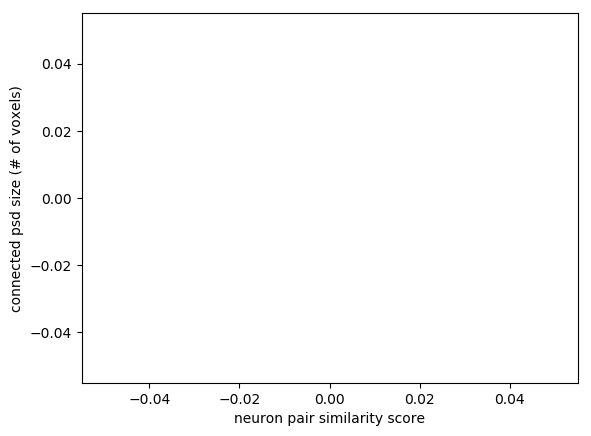

PyObject Text(24.000000000000014, 0.5, 'connected psd size (# of voxels)')

In [23]:
# PyPlot.gui(true)
PyPlot.scatter(similarityList[1:end], psdSizeList[1:end], s=1)
PyPlot.xlabel("neuron pair similarity score")
PyPlot.ylabel("connected psd size (# of voxels)")

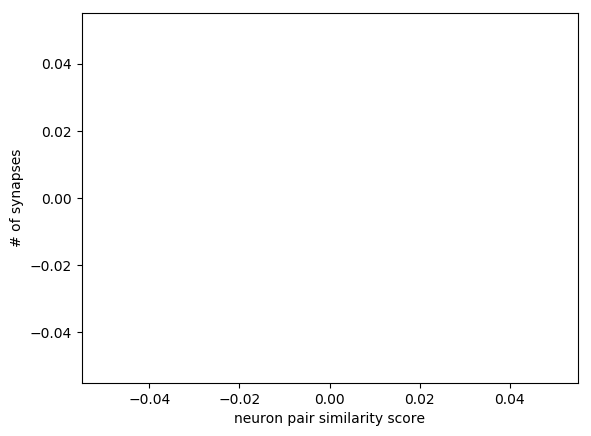

PyObject Text(24.0, 0.5, '# of synapses')

In [24]:
PyPlot.scatter(similarityList[1:100:end], synNumList[1:100:end])
PyPlot.xlabel("neuron pair similarity score")
PyPlot.ylabel("# of synapses")